<b> Title :</b><br>
<b> &emsp; Webapp to predict the optimal price of a used vehicle. </b><br><br>
<b>Team Members :</b><br>
<b> &emsp;  Sriram Manne </b> <br>
   &emsp;   <b>Sarath Surendran</b><br><br>
<b> Date :</b><br>
     &emsp;   <b>10-20-2022</b>

#### About the Dataset

The dataset used for this project was taken from Kaggle and can be found here:<br/>
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data <br><br>
The dataset contains used vehicles data scraped from Craigslist.  <br><br>
The author of the dataset is  : ‘Austin Reese’  <br><br>
The whole dataset is nearly 1.5gb in size and was downloaded in csv format  <br><br>

<b>The dataset has 26 columns : </b><br><br>
&emsp;<b> id :</b> entry ID <br>
&emsp;<b>	url :</b> listing URL <br>
&emsp;<b>	region :</b> listed region<br>
&emsp;<b>	region_url :</b> region url<br>
&emsp;<b>	price :</b> listed price <br>
&emsp;<b>   year :</b> year listed<br>
&emsp;<b>	manufacturer :</b> manufacturer of vehicle<br>
&emsp;<b>	model :</b> model of vehicle<br>
&emsp;<b>	condition :</b> condition of vehicle<br>
&emsp;<b>	cylinders :</b> number of cylinders<br>
&emsp;<b>	fuel :</b> fuel type<br>
&emsp;<b>	odometer :</b> miles traveled by vehicle<br>
&emsp;<b>	title_status :</b> title status of vehicle<br>
&emsp;<b>	transmission :</b> transmission of vehicle<br>
&emsp;<b>	VIN :</b> vehicle identification number<br>
&emsp;<b>	drive :</b> type of drive<br>
&emsp;<b>	size :</b> size of vehicle<br>
&emsp;<b>	type :</b> generic type of vehicle<br>
&emsp;<b>	paint_color :</b> color of vehicle<br>
&emsp;<b>	image_url :</b> image URL<br>
&emsp;<b>	description :</b> listed description of vehicle<br>
&emsp;<b>	county :</b> useless column left in by mistake<br>
&emsp;<b>	state :</b> state of listing<br>
&emsp;<b>	lat :</b> latitude of listing<br>
&emsp;<b>	long :</b> longitude of listing<br>
&emsp;<b>	posting_date :</b> date posted in craigslist<br><br>


#### All imports required for the program to run

In [140]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score


from factor_analyzer import FactorAnalyzer 
from sklearn.decomposition import FactorAnalysis, PCA
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder

import warnings
warnings.filterwarnings("ignore")
import pickle


Reading the extracted csv file and storing it in dataframe for further analysis

In [141]:
df_vehicles = pd.read_csv('dataset/Vehicles.csv', delimiter=',')
df_vehicles.shape

(426880, 26)

### Exploratory Data Analysis

The dataset seems to contain 426880 records with 26 different attributes

In [142]:
df_vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Just by printing the top rows, its evident that the dataset has lots of empty values

Further descbring the dataset

In [143]:
df_vehicles.describe(include="all")

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


The county column seems to have no values. This field along with all the urls,lat,long,description and VIN will not be considered for analysis. So removing them altogether

In [144]:
df_vehicles=df_vehicles.drop(columns=["id","county","region_url","VIN","image_url","url",
                                      "lat","long","description"])
df_vehicles.shape

(426880, 17)

#### Handling missing values

First we get a count of all missing values present under each column

In [145]:
df_vehicles.isna().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
posting_date        68
dtype: int64

Further inspecting the size column which has the largest number of missing values

In [146]:
df_vehicles['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

We will modify the size column to use numerical values

In [147]:
#clearing nan first
df_vehicles['size'][df_vehicles['size'].isna()]='others'
#creating codes
df_vehicles['size_codes']=df_vehicles['size'].astype("category")
df_vehicles['size_codes']=df_vehicles['size_codes'].cat.codes
# df_vehicles['size'][df_vehicles['size'] == "full-size" ]=4
# df_vehicles['size'][df_vehicles['size'] == "mid-size" ]=3
# df_vehicles['size'][df_vehicles['size'] == "compact"]=2
# df_vehicles['size'][df_vehicles['size'] == "sub-compact"]=1

In [148]:
df_vehicles["size_codes"].unique()

array([3, 1, 2, 0, 4], dtype=int8)

So the size of the vehicle is now updated as the following :<br>
"Missing": 0,<br>"full-size": 4,<br>"mid-size": 3,<br>"compact": 2,<br>"sub-compact": 1


Checking manufacturer values

In [149]:
df_vehicles["manufacturer"].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [150]:
df_vehicles['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


All missing values are now replaced with 'Others'

Also most of the vehicle listings seems to be manufactured by 'ford'

In [151]:
df_vehicles['make']=df_vehicles['manufacturer'].astype('category')
df_vehicles['make']=df_vehicles['make'].cat.codes

Further dropping all the missing values from the dataset

In [152]:
df_vehicles['model_codes']=df_vehicles['model'].astype('category')
df_vehicles['model_codes']=df_vehicles['model_codes'].cat.codes

Filtering out vehicles with make year less than 1970

In [153]:
df_vehicles=df_vehicles[df_vehicles['year']>1970]
len(df_vehicles)

420048

Converting vehicle condition to numberic value

In [154]:
df_vehicles.condition.unique()

array(['good', 'excellent', 'fair', 'like new', nan, 'new', 'salvage'],
      dtype=object)

In [155]:

df_vehicles['condition_codes']=df_vehicles.condition.astype('category')
df_vehicles['condition_codes']=df_vehicles['condition_codes'].cat.codes

In [156]:
df_vehicles.condition.unique()

array(['good', 'excellent', 'fair', 'like new', nan, 'new', 'salvage'],
      dtype=object)

Converting fuel type to numeric value

In [157]:
df_vehicles.fuel.unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

In [158]:
df_vehicles["fuel_codes"]=df_vehicles["fuel"].astype('category')
df_vehicles['fuel_codes']=df_vehicles['fuel_codes'].cat.codes
df_vehicles.fuel_codes.unique()

array([ 2,  4,  0,  3, -1,  1], dtype=int8)

Converting title status to numeric

In [159]:
df_vehicles.title_status.unique()

array(['clean', 'rebuilt', 'lien', nan, 'salvage', 'missing',
       'parts only'], dtype=object)

In [160]:
df_vehicles["title_status_codes"]=df_vehicles["title_status"].astype('category')
df_vehicles['title_status_codes']=df_vehicles['title_status_codes'].cat.codes
df_vehicles.title_status_codes.unique()


array([ 0,  4,  1, -1,  5,  2,  3], dtype=int8)

Converting transmission to numeric

In [161]:
df_vehicles.transmission.unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [162]:
df_vehicles["transmission_codes"]=df_vehicles["transmission"].astype('category')
df_vehicles['transmission_codes']=df_vehicles['transmission_codes'].cat.codes
df_vehicles.transmission_codes.unique()

array([ 2,  0,  1, -1], dtype=int8)

Converting drive to numeric 

In [163]:
df_vehicles.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [164]:
df_vehicles["drive_codes"]=df_vehicles["drive"].astype('category')
df_vehicles['drive_codes']=df_vehicles['drive_codes'].cat.codes
df_vehicles.drive_codes.unique()

array([-1,  2,  0,  1], dtype=int8)

Creating new type variable for analysis down the line

In [165]:
df_vehicles['type'].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [166]:
df_vehicles["type_codes"]=df_vehicles["type"].astype('category')
df_vehicles['type_codes']=df_vehicles['type_codes'].cat.codes
df_vehicles['type_codes'].unique()

array([ 8, 10,  7, -1,  3,  0,  4,  5,  9,  6,  1, 11,  2, 12], dtype=int8)

Adding numeric paint color variable

In [167]:
df_vehicles['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [168]:
df_vehicles["paint_color_codes"]=df_vehicles["paint_color"].astype('category')
df_vehicles['paint_color_codes']=df_vehicles['paint_color_codes'].cat.codes

df_vehicles['paint_color_codes'].unique()

array([10,  1,  8,  0,  9,  5, -1,  2, 11,  6,  4,  3,  7], dtype=int8)

Exploring vehicles based on number of cylinders present in engine

In [169]:
print(df_vehicles['cylinders'].unique())

['8 cylinders' '6 cylinders' nan '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']


Replacing string values and dropping 'other'

In [171]:
df_vehicles["cylinders_codes"]=df_vehicles["cylinders"].astype('category')
df_vehicles['cylinders_codes']=df_vehicles['cylinders_codes'].cat.codes
df_vehicles=df_vehicles.dropna()


<AxesSubplot:title={'center':'# of cyclinders'}, xlabel='cylinders', ylabel='count'>

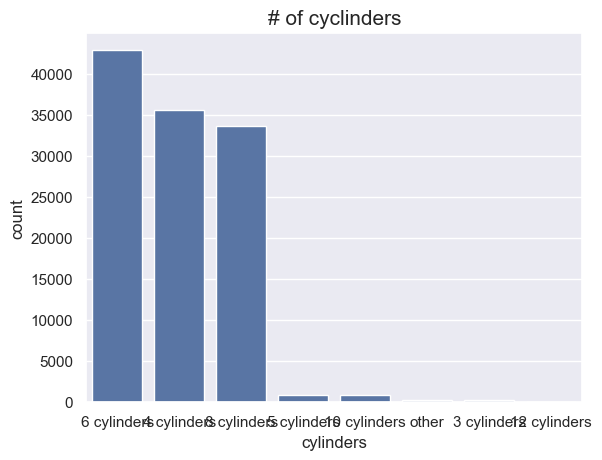

In [172]:
df_cylider=df_vehicles["cylinders"].value_counts().reset_index()
df_cylider.columns=["cylinders","count"]
plt.title("# of cyclinders",size=15)
sns.barplot(df_cylider['cylinders'],df_cylider['count'],color = 'b')

In [173]:
len(df_vehicles)

114434

So for further analysis, we will be considering a total of 118672 records 

#### Now lets explore vehicles per region <br>

Grouping based on region

<AxesSubplot:title={'center':'Used vehicles available by region - top 10'}, xlabel='region', ylabel='count'>

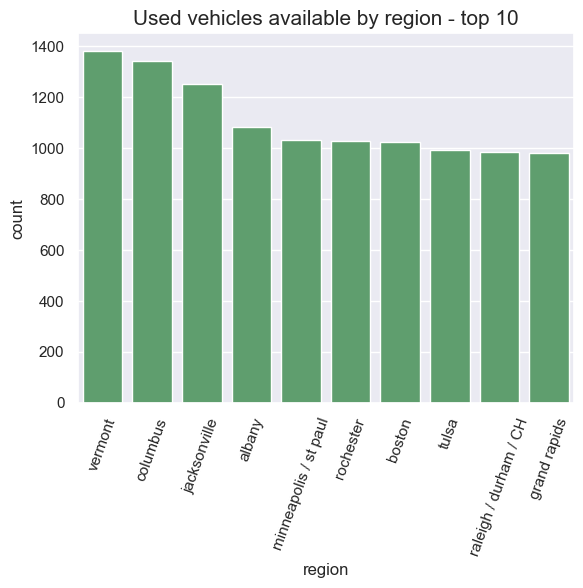

In [174]:
df_reg=df_vehicles["region"].value_counts()[:10].reset_index()
df_reg.columns=["region","count"]
plt.xticks(rotation=70)
plt.title("Used vehicles available by region - top 10",size=15)
sns.barplot(df_reg['region'],df_reg['count'],color = 'g')

#### Vermount seems to have the most number of listings of used vehicles 

Exploring based on year of manufacturing

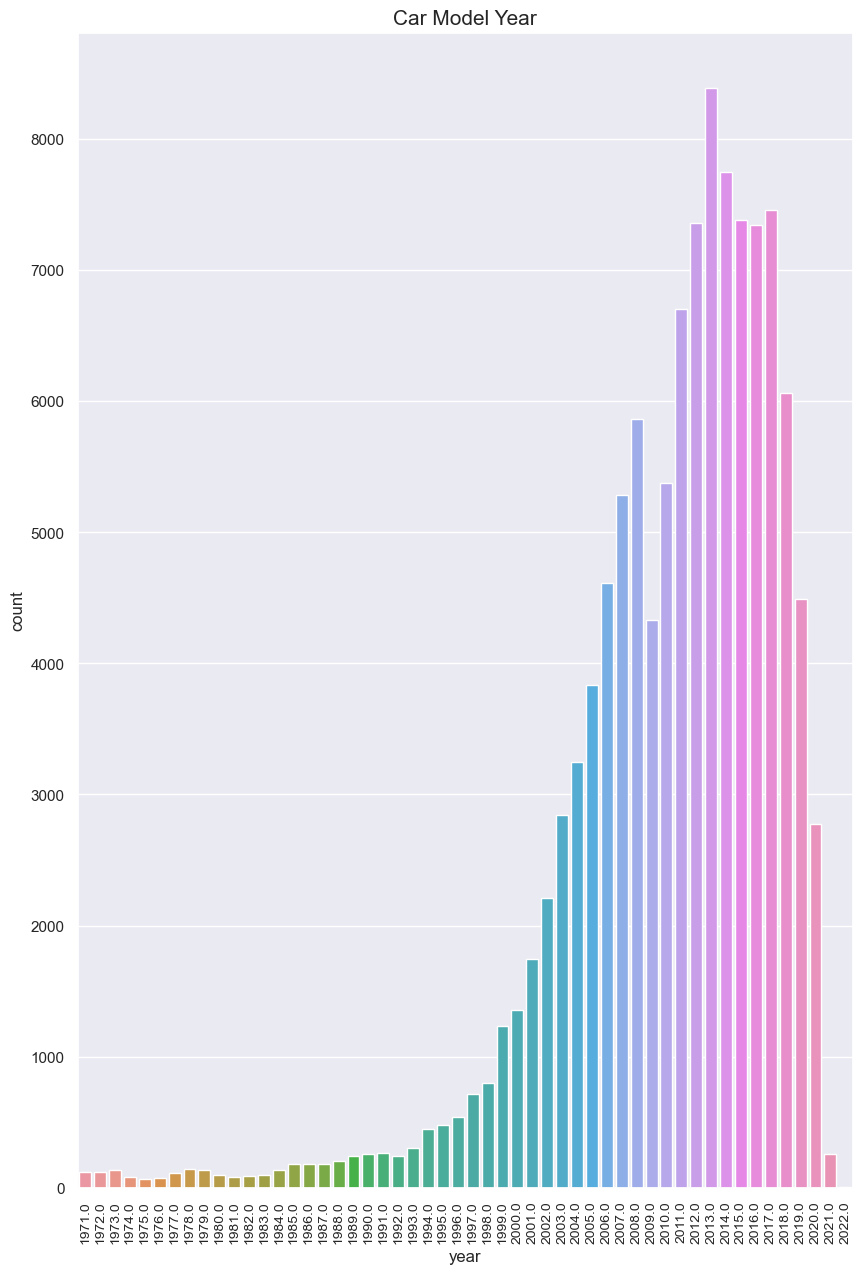

In [175]:
plt.figure(figsize=(10,15))
ax = sns.countplot(df_vehicles['year'])
plt.title("Car Model Year",size=15)
k = ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=10)

Most vehicles seems to have been made during the 2012-2014 period

#### Grouping vehicles based on color

<AxesSubplot:title={'center':'Color count of Cars'}, xlabel='car color', ylabel='count'>

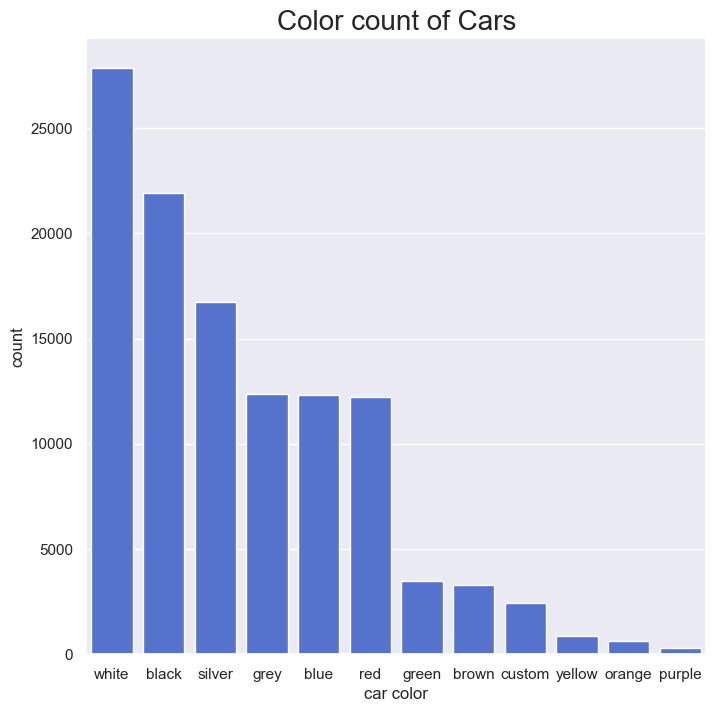

In [176]:
plt.figure(figsize=(8,8))
color_df = df_vehicles['paint_color'].value_counts().reset_index()
color_df.columns = ['car color','count']
plt.title("Color count of Cars",size=20)
sns.barplot(color_df['car color'],color_df['count'],color = 'royalblue')

Most of the listings seems to be of 'white' color. No surprise there. Lease being purple.

#### Examining price range

In [177]:
df_vehicles[df_vehicles['price']>200000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,make,model_codes,condition_codes,fuel_codes,title_status_codes,transmission_codes,drive_codes,type_codes,paint_color_codes,cylinders_codes
29386,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,...,13,15654,2,0,0,0,2,8,10,6
68935,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,...,36,18821,2,2,0,0,1,9,4,3
136516,spokane / coeur d'alene,17000000,2007.0,ram,2500,good,8 cylinders,diesel,170000.0,rebuilt,...,34,2001,2,0,4,0,0,8,0,6
137807,spokane / coeur d'alene,123456789,1999.0,buick,regal,like new,6 cylinders,gas,96000.0,clean,...,5,22915,3,2,0,0,1,9,10,5
155421,terre haute,1234567,2006.0,jeep,wrangler,like new,6 cylinders,gas,123456.0,clean,...,20,28532,3,2,0,0,0,0,3,5
230753,asheville,135008900,2008.0,nissan,titan se kingcab,like new,8 cylinders,gas,110500.0,clean,...,31,27029,3,2,0,0,0,10,5,6
307488,stillwater,123456789,1996.0,gmc,sierra 2500,fair,8 cylinders,gas,320000.0,clean,...,14,24469,1,2,0,0,0,8,0,6
318592,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,clean,...,39,27788,0,2,0,0,0,8,9,6


Some of the prices listed seems to be unrealistic .<br>

Boxplot for confirming outliers

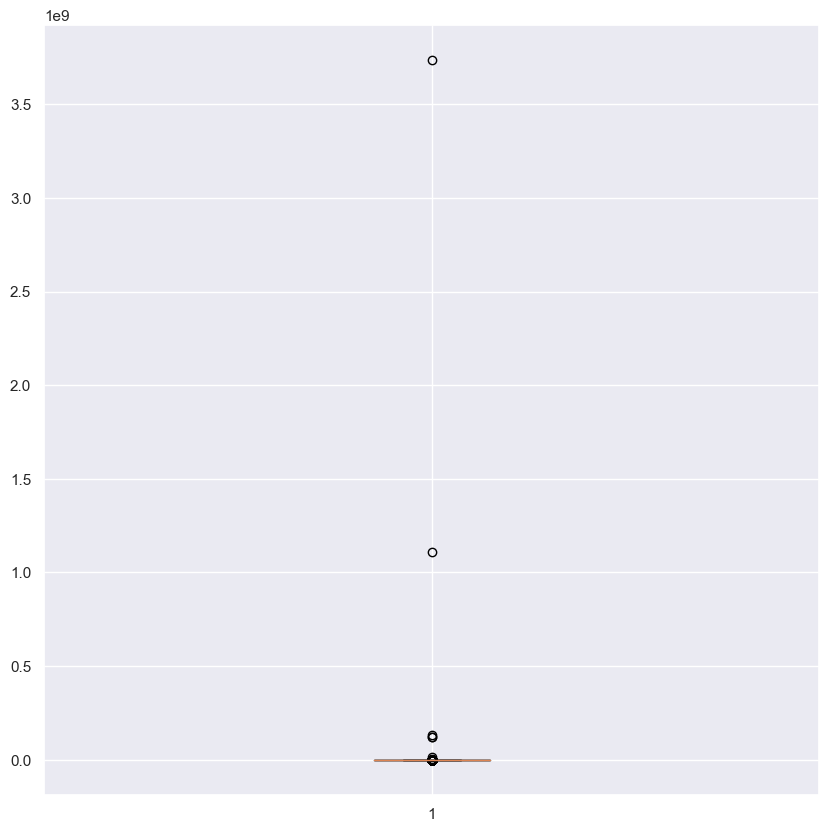

In [178]:
plt.figure(figsize = (10,10))
plt.boxplot(df_vehicles["price"])
plt.show()

The boxplot clearly shows the existence of extreme outliers.

In [179]:
df_vehicles['price'].max()

3736928711

Someone seems to have listed a toyota tundra for 37 billion dollars. Wishful thinking.<br>
For this analysis we will only include records between 1000 - 600000 dollars

In [180]:
final_df=df_vehicles.loc[(df_vehicles['price']>=1000) & (df_vehicles['price']<= 600000)]
pickle.dump(final_df,open("static/models/df_vehicles.p",'wb'))

In [181]:
len(final_df)

107853

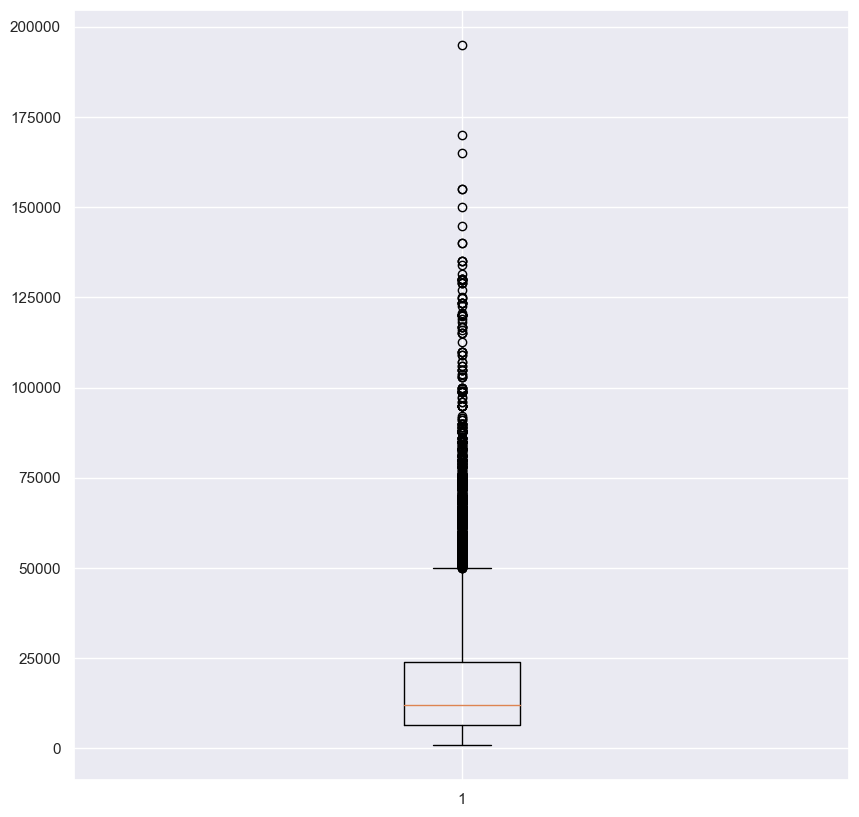

In [182]:
plt.figure(figsize = (10,10))
plt.boxplot(final_df["price"])
plt.show()

We were able to get rid of lot of outliers just by clearing some unrealistic listings

#### Checking for year

Year feature - lower whishker = 1995.0

Here is the boxplot of year after the outliers below lower whishker are removed.


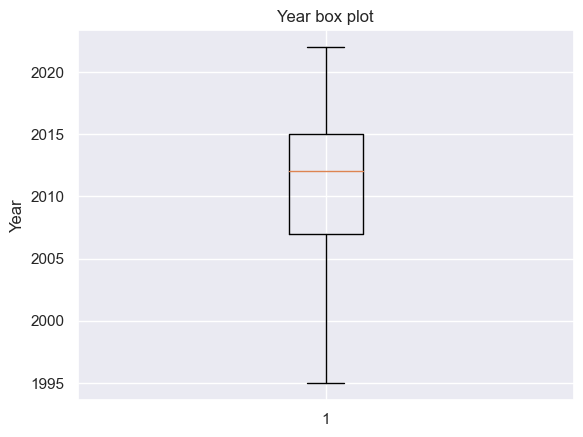

In [183]:
stats = final_df['year'].describe()

upper_quartile = stats[6]
lower_quartile = stats[4]

iqr = upper_quartile - lower_quartile
lower_whisker = final_df['year'][final_df.year>=lower_quartile-1.5*iqr].min()
print("Year feature - lower whishker =", lower_whisker)

dataset_year_updated = final_df[final_df.year>=lower_quartile-1.5*iqr]
print("\nHere is the boxplot of year after the outliers below lower whishker are removed.")
plt.boxplot(dataset_year_updated['year'])
plt.title("Year box plot")
plt.ylabel("Year")
plt.show()

Checking outliers for odometer readings

Odometer feature - upper whishker = 195000

boxplot of odometer with outliers removed.


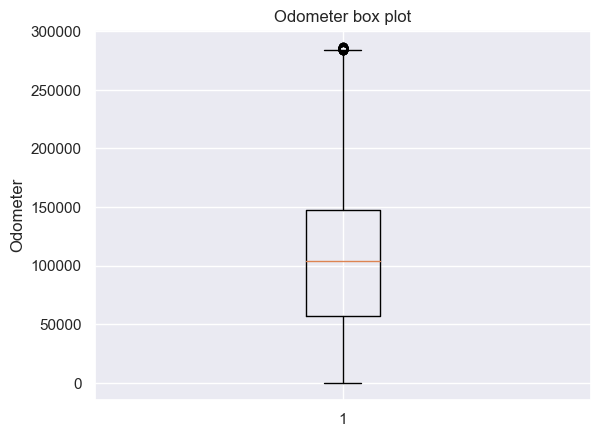

In [184]:
stats = final_df['odometer'].describe()

upper_quartile = stats[6]
lower_quartile = stats[4]

iqr = upper_quartile - lower_quartile
upper_whisker = final_df['price'][final_df.price<=upper_quartile+1.5*iqr].max()
print("Odometer feature - upper whishker =", upper_whisker)

dataset_odo_updated = final_df[final_df.odometer<=upper_quartile+1.5*iqr]
print("\nboxplot of odometer with outliers removed.")
import matplotlib.pyplot as plt
plt.boxplot(dataset_odo_updated['odometer'])
plt.title("Odometer box plot")
plt.ylabel("Odometer")
plt.show()

Further comparing odometer readings and price of the car using scatter plot

<AxesSubplot:xlabel='odometer', ylabel='price'>

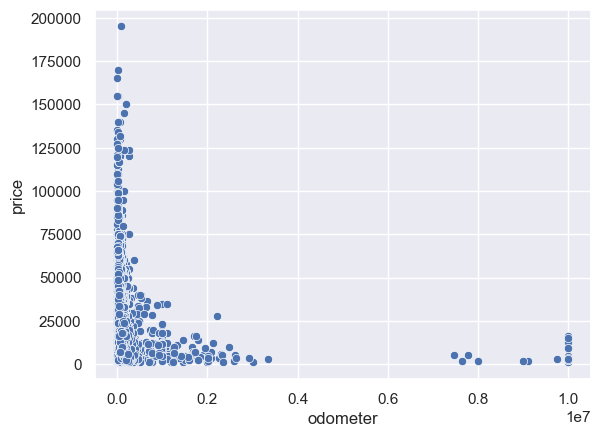

In [185]:
sns.scatterplot(x="odometer",y="price",data=final_df)

Highest prices seems to be towards the lowest odometer readings, which makes sense

Further comparing year of make and price

<AxesSubplot:xlabel='year', ylabel='price'>

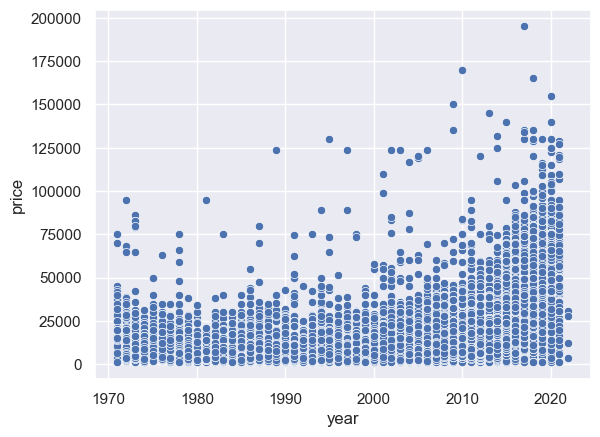

In [186]:
sns.scatterplot(x="year",y="price",data=final_df)

Again, the newest of cars seems to have the highest of prices, which again makes sense

In [187]:
print(final_df.columns)
X=final_df.drop(columns=['region',
                         'price','manufacturer','model','paint_color',
                         'state','posting_date','type',"condition","cylinders","fuel","title_status","transmission","drive","size","title_status_codes","fuel_codes"]) 
y=final_df['price']


Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'posting_date',
       'size_codes', 'make', 'model_codes', 'condition_codes', 'fuel_codes',
       'title_status_codes', 'transmission_codes', 'drive_codes', 'type_codes',
       'paint_color_codes', 'cylinders_codes'],
      dtype='object')


In [188]:
len(X)

107853

In [189]:
for col in X.columns:
    print(col)

year
odometer
size_codes
make
model_codes
condition_codes
transmission_codes
drive_codes
type_codes
paint_color_codes
cylinders_codes


In [190]:
X.head(3)

,year,odometer,size_codes,make,model_codes,condition_codes,transmission_codes,drive_codes,type_codes,paint_color_codes,cylinders_codes
31,2013.0,128000.0,1,13,14531,0,0,2,10,0,5
32,2012.0,68696.0,3,14,24489,2,2,0,8,0,6
33,2016.0,29499.0,3,7,24820,2,2,0,8,9,5


## Section 4

### Employing linear regression model for prediction

#### Splitting data into train and test

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

#### Scaling before fitting into model

In [192]:
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.fit_transform(X_test)

#### Linear Regression Model

In [193]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

#### Retrieving model params

In [194]:

print("Coefficients: \n", lr.coef_)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print(f"intercept: {lr.intercept_}")

Coefficients: 
 [ 8.09527315e+02 -9.98563560e-03 -2.58277074e+01  1.44429687e+01
 -1.32811360e-02  3.31211649e+02  4.70612033e+03 -9.72136708e+02
  1.26228235e+02  9.90021342e+01  3.58295576e+03]
Mean squared error: 92211121.542
Coefficient of determination: 0.46
intercept: -1628771.1231904312


In [195]:
score =lr.score(X_train,y_train)
print(score)



0.4615791284627264


In [196]:
X[4:5]

,year,odometer,size_codes,make,model_codes,condition_codes,transmission_codes,drive_codes,type_codes,paint_color_codes,cylinders_codes
35,2016.0,17302.0,3,7,11026,2,2,0,8,8,5


In [197]:


lr.predict(X[4:5])

array([32731.63759314])

In [198]:
y[4:5]


35    29990
Name: price, dtype: int64

In [199]:
lassoReg = Lasso(alpha=0.3, normalize=True)

In [200]:
lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

In [201]:
print("Coefficients: \n", lassoReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(y_test, pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print(f"intercept: {lassoReg.intercept_}")

Coefficients: 
 [ 8.01221236e+02 -9.52574187e-03  0.00000000e+00  5.27418577e+00
 -0.00000000e+00  2.72159981e+02  4.62555751e+03 -8.38978325e+02
  1.07432194e+02  7.68973325e+01  3.49548009e+03]
Mean squared error: 92191817.363
Coefficient of determination: 0.46
intercept: -1611594.9357243595


In [202]:
score =lassoReg.score(X_train,y_train)
print(score)

0.4611586800773436


In [203]:
lassoReg.predict(X[:5])

array([16986.44672742, 31509.42160859, 32247.36365626, 24803.0343437 ,
       32286.65179732])

In [204]:
y[:5]

31    15000
32    27990
33    34590
34    35000
35    29990
Name: price, dtype: int64

In [205]:
from sklearn.linear_model import Ridge

In [206]:
rdg = Ridge(alpha = 0.5)
rdg.fit(X_train,y_train)

pred = rdg.predict(X_test)

In [207]:
rdg.score(X,y)

0.4617640818428759

In [208]:
rdg.predict(X[:5])

array([16730.94633987, 31693.43915423, 32525.5313953 , 25042.96850776,
       32731.52246431])

In [209]:
y[:5]

31    15000
32    27990
33    34590
34    35000
35    29990
Name: price, dtype: int64

## Section 5

### Personal Contribution Statement :
#### Team project: What was your contribution during this Sprint stage? <br> 

This time around time management and catching up with each other was a challenge since both of us fell sick at almost the same time. So we had to scramble a bit at the end. Contributions to most sections were equally divided.
        We were on call most of the time sharing code and ideas. <br> <br>
        What could have been done better (future improvements of your work)?<br>
            This sprint was a bit bad for us cause of health issues but in future we dont anticipate any such struggles. We could only test one model and did not get much of a chance to tune it.
            In future, We intend to employ more models and further tune the existing ones.
            <br><br>
    
#### Individual project: 
   What could have been done better  (future improvements of your work)? <br>
     
   I personally could have advocated to add more models or atleast tuned  the currently employed prediction model . Unfortunately time management was bad in this sprint and the same needs to be corrected from next. One thing about the entire experience was that we both were in sync regarding most of the decisions and hopefully the same will continue.
    